# Bracket search
### Michiel Stock
### 2019-2020

In [1]:
using Plots, LaTeXStrings
using STMO: myred, myblue, mygreen, myyellow, myorange,myblack

As a first introduction to mathematical optimization, we will study two *bracketing methods*. Bracketing methods can be used to minimize scalar function with a single input variable. These algorithms identify an interval $[a, b]$ containing the desired minimum. We will assume that the functions are *unimodal* they contain a single minimum.

# Finding an initial bracket

The following function will generate from an initial $x$ an interval containing a local minimum. It works by moving one of the limits of the interval until the function value at that limit starts to decrease.

In [2]:
function bracket_minimum(f, x=0.0; s=1e-2, k=2.0)
  a, ya = x, f(x)  # lower limit of the interval
  b, yb = x, f(x + s)  #  upper limit of the interval
  if yb > ya  # default assumes f is decreasing in a, flip if not the case
    a, b = b, a
    ya, yb = yb, ya
    s = -s  # go to the left instead of right
  end
  while true
    c, yc = b + s, f(b + s)
    if yc > yb
      return a < c ? (a, c) : (c, a)
    end
    a, ya = b, yb
    b, yb = c, yc
    s *= k
  end
end

bracket_minimum (generic function with 2 methods)

In [3]:
f(x) = 0.003x^4 + 8x^3 - 3x - 8

(a, b) = bracket_minimum(f, k=1.2)

(0.25958682112, 0.3958050224127999)

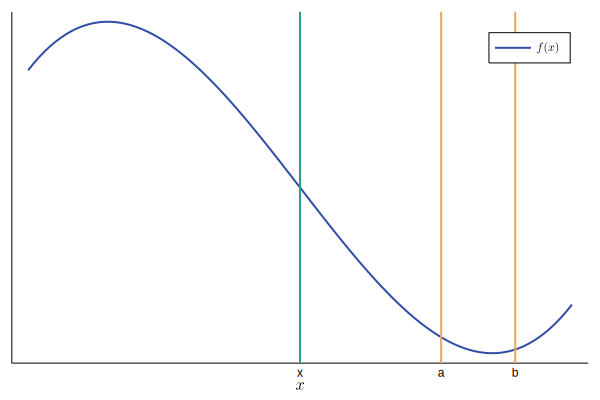

In [4]:
plot(f, -0.5:0.01:0.5, xlabel="\$ x\$", label="\$ f(x) \$", color=myblue, lw=2)
vline!([a, b], label="", color=myorange, lw=2)
vline!([0], label="", color=mygreen, lw=2)
xticks!([a, b, 0], ["a", "b", "x"])
yticks!(:none)

# Bisection method

The bisection method is technically not a minimization algorithm, but a *root finding method*, i.e., it can be used to find an $x$ for a given function $g: \mathbb{R}\rightarrow \mathbb{R}$ such that

$$
g(x) = 0\,.
$$

We can use the bisection method to find a minimum of a function $f(x)$ by finding points where the first derivative $f'(x)$ is equal to 0.

> **Question**: in addition to the first derivative being equal to zero, which other criteria should hold for $x^\star$ to be a minimizer?

> **Answer**: The second derivative has to be positive at $x^\star$.

The bisection method departs from an initial bracket $[a, b]$, where $g(a)$ and $g(b)$ have opposing signs. If $g(x)$ is a continious function, the *intermediate value theorem* states that there is at least one $x\in[a,b]$ such that $g(x)$.

In every step of the bisection method, the interval it cut into half. The midpoint $x = (a+b)/2$ is computed, and a new bracket is formed from the midpoint and the side that contains zero.

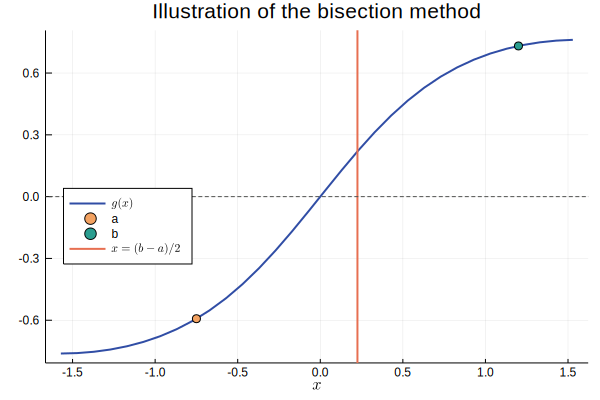

In [5]:
g(x) = tanh(sin(x))

a, b = -0.75, 1.2

plot(g, -pi/2:0.1:pi/2, label="\$g(x)\$", lw=2, color=myblue, xlabel="\$ x\$", legend=:left)
scatter!([a], [g(a)], color=myorange, label=:a)
scatter!([b], [g(b)], color=mygreen, label=:b)
vline!([(b+a)/2], color=myred, label="\$x = (b-a)/2\$", lw=2)
hline!([0], label="", color=myblack, ls=:dash)
title!("Illustration of the bisection method")

The bisection procedure is repeated until the length of the interval is smaller than a small $\epsilon > 0$. This $\epsilon$ is called a *convergence parameter*, because it determines when the algorithm will halt. The pseudocode of the bisection method is given below.

> **given** $g(x)$, the derivative of a function, initial interval $[a, b]$, tolerance $\epsilon$.
>
> **while** $b - a > \epsilon$
>> 1. *Determine midpoint*. $x:=(a+b)/2$
>> 2. *Update*.
>>> **if $g(x)=0$**: $a:=x$, $b:=x$
>>>
>>> **else if $\text{sign}(g(x)) = \text{sign}(g(a))$**: $a:=x$
>>>
>>> **else**: $b:=x$
>
> **Output**: $[a, b]$

Since every step shrinks the interval with a factor two, it is easy to show that this procedure stops within

$$
\log_2\left(\frac{b-a}{\epsilon}\right)
$$

iterations.

**Assignment 1** Complete the code for the bisection method. Use it to find the minimum of

$$
f(x) = \log(e^{8x-3}+2e^{0.2x^2-x+1})
$$

Check your results graphically.

In [6]:
function bisection(g, a, b; ϵ=1e-3)
  @assert a < b "a should be smaller than b"

  # a is minizer?
  g(a) == 0 && return a, a
  # b is minizer?
  g(b) == 0 && return b, b

  ga,gb = g(a),g(b)
  while (b-a)/2 > ϵ
        x = (a+b)/2
        gx = g(x)
        gx == 0 && return x,x
        if sign(gx) == sign(ga)
            a,ga = x,gx
        else
            b,gb = x,gx
        end
  end
  return a, b
end

bisection (generic function with 1 method)

In [7]:
f(x) = log(exp(8x-3)+2exp(0.2x^2-x+1))

f (generic function with 1 method)

> To type `f′` just type `f\prime<tab>`. Whenever you are unsure how to type a unicode character you can call it using the help, e.g. `?ϵ`.

In [8]:
f′(x) = (8exp(8x-3)+2*(0.4x-1)*exp(0.2x^2 -x +1))/(exp(8x-3) + 2*exp(0.2x^2 -x +1))

f′ (generic function with 1 method)

(a′, b′) = bisection(f′, -2, 2) = (0.27734375, 0.279296875)


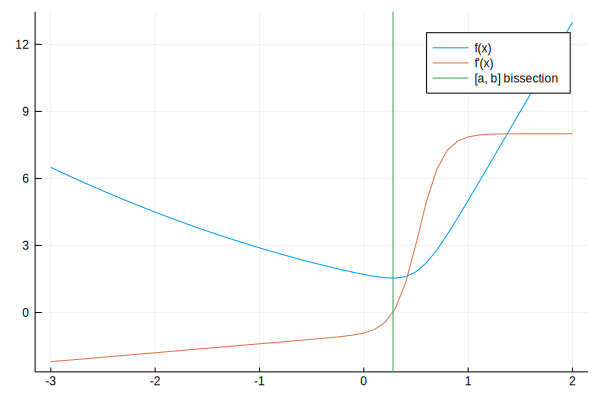

In [9]:
plot(f,-3:0.1:2, label = "f(x)")
plot!(f′,-3:0.1:2, label = "f'(x)")
@show (a′, b′) = bisection(f′,-2,2)
vline!((a′, b′), label="[a, b] bissection")

# Quadratic fit search

As we will see in the next lecture, finding the minimum of quadratic functions of the form

$$
q(x) = p_1 + p_2 x + p_3 x^2
$$

is trivial. The *quadratic fit search method* will approximate a function by a quadratic function and computes the minimizer of that function.

Given three bracketing points $a<b<c$ and their respective evaluations $y_a=f(a), y_b=f(b)$ and $y_c=f(c)$, we can fit a quadratic curve by solving the following system of equations for the coefficients:

$$
\begin{bmatrix}y_a\\ y_b \\ y_c\end{bmatrix} = \begin{bmatrix}1 & a & a^2 \\ 1 & b & b^2 \\ 1 & c & c^2 \end{bmatrix} \begin{bmatrix}p_1\\ p_2 \\ p_3\end{bmatrix}\,.
$$

For example, in Julia, we have:

In [10]:
a, b, c = -2, -1, 3
ya, yb, yc = f.([a, b, c])

p1, p2, p3 = [1 a a^2; 1 b b^2; 1 c c^2] \ [ya, yb, yc]

3-element Array{Float64,1}:
 3.743833850540768 
 2.076028154402226 
 1.2253424097215746

We can even dispense solving the system and use a closed-form fit based on three points:

$$
q(x) = y_a\frac{(x-b)(x-c)}{(a-b)(a-c)} +  y_b\frac{(x-a)(x-c)}{(b-a)(b-c)}+ y_c\frac{(x-a)(x-b)}{(c-a)(c-b)}\,.
$$

The unique minimum of this quadratic curve is computed by:

$$
x^\star = \frac{1}{2} \frac{y_a(b^2-c^2) + y_b(c^2-a^2)+ y_c(a^2-b^2)}{y_a(b-c) + y_b(c-a)+ y_c(a-b)}\,.
$$

We have implemented these two formulas in `quadratic_fit` and `quadratic_fit_min`. See below for an illustration.

In [11]:
function quadratic_fit(a, b, c, ya, yb, yc)
  @assert a != b != c
  return x -> ya * (x-b) * (x-c) / ((a-b) * (a-c)) +
              yb * (x-a) * (x-c) / ((b-a) * (b-c)) +
              yc * (x-a) * (x-b) / ((c-a) * (c-b))
end

function quadratic_fit_min(a, b, c, ya, yb, yc)
  return 0.5 * (ya * (b^2 - c^2) + yb * (c^2 - a^2) + yc * (a^2 - b^2)) /
        (ya * (b-c) + yb * (c-a) + yc * (a-b))
end

quadratic_fit_min (generic function with 1 method)

In [12]:
x = quadratic_fit_min(a, b, c, ya, yb, yc)

-0.8471216445017791

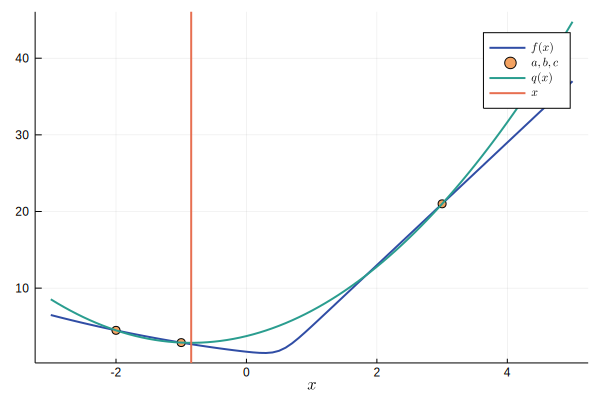

In [13]:
plot(f, -3:0.1:5, label="\$f(x)\$", lw=2, xlabel="\$x\$", color=myblue)
scatter!([a, b, c], [ya, yb, yc], label="\$a, b, c\$", color=myorange)
plot!(quadratic_fit(a, b, c, ya, yb, yc), -3:0.1:5, label="\$ q(x) \$", lw=2, color=mygreen)
vline!([x], label="\$x\$", lw=2, color=myred)

Given the minimizer $x^\star$ of the quadratic approximation, we can update the interval closer to this value. The quadratic fit search repeats this approach $n$ times. The pseudocode is given below.

> **given** $f(x)$, the function to be minimized, three increasing values $a, b, c$ with $f(a) > f(b)$ and $f(c) > f(b)$, the number of steps $n$.
>
> **repeat** $n$ times
>> 1. *Fit quadratic*
>> 2. *Determine minimizer of $q(x)$*
>> 3. *Update bracket*:
>>> **if $x\in [a,b]$**: $a, b, c := a, x, b$
>>> **else**: $a, b, c := b, x, c$
>
> **Output**: $a, b, c$

**Assignment 2** Complete the code for the quadratic fit search method. Use it again to find the minimizer of the provided $f(x)$.

In [14]:
function quadratic_fit_search(f, a, b, c, n)
  @assert a < b < c "a, b, c not consecutive "
  @assert f(a) > f(b) && f(c) > f(b) "f(b) should be less than f(a) and f(c)"

  for i in 1:n
    x = quadratic_fit_min(a,b,c,f(a),f(b),f(c))
        if a < x < b
            a,b,c = a,x,b
            else b < x < c
            a,b,c = b,x,c
        end
  end
  return a, b, c
end

quadratic_fit_search (generic function with 1 method)

In [15]:
a′, b′, c′ = quadratic_fit_search(f, a, b, c, 10)

(0.2500186644935173, 0.2786820123628695, 0.2825567703349505)

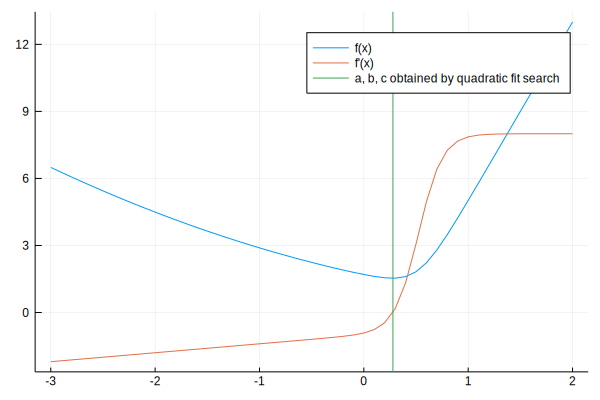

In [16]:
plot(f,-3:0.1:2, label = "f(x)")
plot!(f′,-3:0.1:2, label = "f'(x)")
vline!((a′, b′, c′), label="a, b, c obtained by quadratic fit search")

The coming chapters will discuss the minimization of quadratic functions in much greater detail.

# Exercises

1. Find the maximum of $\sqrt[\leftroot{-2}\uproot{2}x]{x}$.
2. Given a chemical system for which a chemical with concentration is degraded by enzymic conversion and chemical decay. The rate of removal is given by
$$
r(x) = 0.02 + 1.2\frac{x}{10+x}\,.
$$
The system receives a constant input with a concentration of 0.3. What is the steady-state concentration?

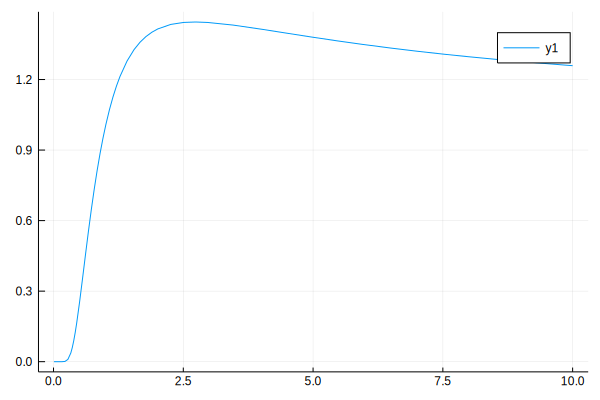

In [17]:
h(x) = x^(1/x)
plot(h,0.01,10)

In [18]:
quadratic_fit_search(x->-h(x),1,2,5,10)

(2, 2.721134316084357, 2.723440311198943)

In [19]:
h′(x) = -x^(-2 + 1/x) * (log(x)-1)

h′ (generic function with 1 method)

In [20]:
bisection(x->h′(x),1,10)

(2.71826171875, 2.7193603515625)

**Decay**

(a, b) = bisection((x->begin
                #= In[21]:4 =#
                r(x) - 0.3
            end), 0, 100) = (3.0426025390625, 3.04412841796875)


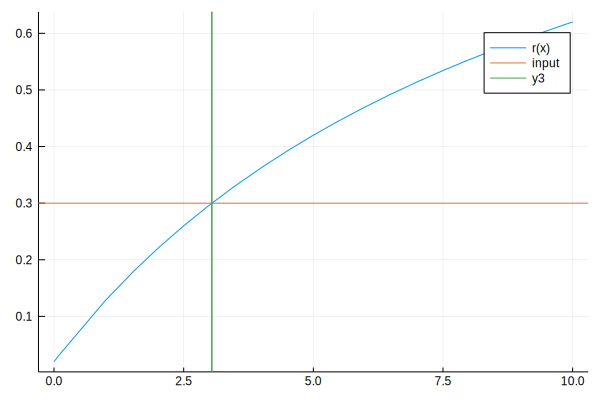

In [21]:
r(x) = 0.02 + 1.2x/(10.0 + x)
plot(r, 0, 10, label="r(x)")
hline!([0.3], label="input")
@show a, b = bisection(x -> r(x) - 0.3, 0, 100)
vline!([a, b])

# References

- Kochenderfer, M. J. and Wheeler, T., '*Algorithms for Optimization*'. MIT Press (2019)